#  Занятие 9
# Типы бустингов. Многоклассовая классификация. Дисбалан классов.

Catboost, XGBoost, LightGBM. Блендинг моделей.

Задача бинарной классификации. Многоклассовая классификация. Подход “One-vs-All”. Модели для решения задачи бинарной классификации. Проблема дисбаланса классов. Upsampling и dowmsampling.


**Бустинг** — это техника построения ансамблей, в которой предсказатели построены не независимо, а последовательно

Это техника использует идею о том, что следующая модель будет учится на ошибках предыдущей. Они имеют неравную вероятность появления в последующих моделях, и чаще появятся те, что дают наибольшую ошибку. Предсказатели могут быть выбраны из широкого ассортимента моделей, например, деревья решений, регрессия, классификаторы и т.д. Из-за того, что предсказатели обучаются на ошибках, совершенных предыдущими, требуется меньше времени для того, чтобы добраться до реального ответа. Но мы должны выбирать критерий остановки с осторожностью, иначе это может привести к переобучению.

**Градиентный бустинг** — это техника машинного обучения для задач классификации и регрессии, которая строит модель предсказания в форме ансамбля слабых предсказывающих моделей, обычно деревьев решений.

## Основные этапы построения

1. Алгоритм бустинга присваивает равный вес каждой выборке данных. Он передает данные первой модели, называемой базовым алгоритмом. Для каждой выборки данных базовый алгоритм делает прогнозы.

2. Алгоритм бустинга оценивает прогнозы модели и увеличивает вес выборок с более значительной ошибкой. Также вес присваивается на основе производительности модели. Модель с лучшими прогнозами будет иметь большое влияние на окончательное решение.

3. Алгоритм передает взвешенные данные следующему дереву решений.

4. Алгоритм повторяет шаги 2 и 3 до тех пор, пока ошибки обучения не опустятся ниже определенного порога.

![image-2.png](attachment:image-2.png)

Источник: https://stepik.org/lesson/562375/step/7

## Виды бустинга

### Адаптивный бустинг

**Адаптивный бустинг (AdaBoost)** — одна из самых ранних моделей бустинга. Он адаптируется и самостоятельно корректирует классификаторы в каждой итерации бустинга.

**AdaBoost** изначально присваивает одинаковый вес каждому набору данных. Затем он автоматически корректирует веса точек выборки после каждого шага на дереве решений. Элементы, которые были классифицированы неверно, приобретают больший вес в следующей итерации. Процесс повторяется до тех пор, пока остаточная ошибка или разница между фактическими и прогнозируемыми значениями не опустится ниже допустимого уровня.

**AdaBoost** можно использовать со многими предикторами. Кроме того, он менее чувствителен, чем другие алгоритмы бустинга. AdaBoost не так эффективен при корреляции между признаками или использовании данных большой размерности. В целом, AdaBoost справляется с задачами квалификации.

###  Градиентный бустинг

**Градиентный бустинг (GB)** похож на AdaBoost: он также представляет собой метод последовательного обучения. Разница между AdaBoost и GB в том, что GB не присваивает неправильно классифицированным элементам больший вес. Вместо этого программное обеспечение GB оптимизирует функцию потерь через последовательное генерирование базовых моделей, в результате чего текущая базовая модель всегда становится эффективнее предыдущей. В отличие от AdaBoost, метод GB пытается сразу генерировать точные результаты, а не исправлять ошибки. По этой причине метод GB дает более точные результаты. Градиентный бустинг подходит и для задач классификации, и для регрессии.

Примерами градиентного бустинга являются Catboost.
ВCatBoost используется для улучшения результатов поисковой системы Яндекс, ранжирования персональной ленты рекомендаций — например в Яндекс.Дзен, для расчёта прогноза погоды и в других интернет-сервисах компании «Яндекс», для оптимизации расхода сырья и предсказания дефектов при производстве, физике элементарных частиц и для решения многих других задач.

CatBoost был внедрён Европейским центром ядерных исследований (ЦЕРН) при исследованиях на Большом адронном коллайдере (БАК) для объединения информации с различных частей детектора LHCb в максимально точное, агрегированное знание о частице. Используя для комбинирования данных CatBoost, учёным удалось добиться улучшения качественных характеристик финального решения, где результаты CatBoost оказались лучше результатов, получаемых с использованием других методов.

Работа с категориальными признаками реализована с помощью двух видов кодирования категориальных признаков:

* LabelEncoding — на реальных примерах точность работы низкая, так как появляется отношения порядка между объектами;

* One-hot encoding — дает неплохую точность, если различных значений признаков не много. Иначе один признак размножится на множество признаков и будет влиять на модель заведомо сильнее остальных признаков.

Гиперпараметры (англ. hyperparameters), на которые стоит обратить внимание при использовании библиотеки.

* cat_features;
* Overfitting detector;
* Число итераций и learning rate;
* L2_reg;
* Random_srength;
* Bagging_temp;
* Глубина дерева (стоит попробовать 10 и 6).

###  Экстремальный градиентный бустинг

**Экстремальный градиентный бустинг (XGBoost)** различными способами улучшает градиентный бустинг, фокусируясь на скорости вычислений и масштабах модели. XGBoost разработан для эффективной многоядерной параллельной обработки прямо во время обучения. Этот алгоритм бустинга является эффективным инструментом для работы с большими данными. Ключевыми особенностями XGBoost являются распараллеливание, распределенные вычисления, оптимизация кэша и внешние вычисления.

### Сплиты
Перед обучением все алгоритмы создают пары признак-сплит для всех признаков. Примерами таких пар являются: (возраст, <5), (возраст, >10), (сумма, >500). Эти пары признак-сплит строятся на основе гистограммы и используются во время обучения в качестве возможных расщеплений узлов. Этот метод предварительной обработки быстрее, чем точный жадный алгоритм, который линейно перечисляет все возможные разбиения для непрерывных признаков.

lightGBM предлагает градиентную одностороннюю выборку (GOSS), которая выбирает разбиение, используя все экземпляры с большими градиентами (т.е. с большой ошибкой) и случайную выборку экземпляров с малыми градиентами. Чтобы сохранить одинаковое распределение данных при вычислении информационного выигрыша, GOSS вводит постоянный множитель для экземпляров данных с малыми градиентами. Таким образом, GOSS достигает хорошего баланса между увеличением скорости за счет уменьшения количества экземпляров данных и сохранением точности для выученных деревьев решений. Этот метод не является методом по умолчанию для LightGBM, поэтому его следует выбирать явно.

Catboost предлагает новую технику под названием Minimal Variance Sampling (MVS), которая представляет собой взвешенную выборку версии Stochastic Gradient Boosting. В этой технике взвешенная выборка происходит на уровне дерева, а не на уровне разбиения. Наблюдения для каждого дерева бустинга отбираются таким образом, чтобы максимизировать точность оценки разбиения.

XGboost не использует никаких методов взвешенной выборки, что делает его процесс разбиения более медленным по сравнению с GOSS и MVS.

![image-3.png](attachment:image-3.png)

Источник: https://vk.com/@coeusds-xgboost-lightgbm-ili-catboost-kakoi-algoritm-bustinga-sled

### Рост листьев

Catboost строит сбалансированное дерево. На каждом уровне такого дерева выбирается пара признак-сплит, которая приносит наименьшие потери (согласно штрафной функции) и используется для всех узлов уровня. Можно изменить его правила с помощью параметра grow-policy.

LightGBM использует рост дерева по листьям (по принципу "лучший-первый"). Он выбирает для роста тот лист, который минимизирует потери, что позволяет вырастить несбалансированное дерево. Поскольку дерево растет не по уровням, а по листьям, при малых данных может произойти перебор. В таких случаях важно контролировать глубину дерева.

XGboost разделяет до заданного гиперпараметра max_depth, а затем начинает обрезать дерево в обратном направлении и удаляет части, за пределами которых нет положительного выигрыша. Такой подход используется, поскольку иногда за расщеплением без уменьшения потерь может следовать расщепление с уменьшением потерь. XGBoost также может выполнять рост дерева по листьям (как LightGBM).

### Обработка пропущенных значений

Catboost имеет два режима обработки отсутствующих значений: "Min" и "Max". В режиме "Min" отсутствующие значения обрабатываются как минимальное значение для признака (им присваивается значение, которое меньше всех существующих значений). Таким образом, гарантируется, что при выборе разбиения будет учитываться разбиение, которое отделяет отсутствующие значения от всех остальных значений. "Max" работает точно так же, как и "Min", только с максимальными значениями.

В LightGBM и XGBoost недостающие значения будут распределяться в ту сторону, которая уменьшает потери в каждом разбиении.

### Метод важности признаков

Catboost имеет два метода: Первый - "PredictionValuesChange". Для каждого признака PredictionValuesChange показывает, насколько в среднем изменяется предсказание при изменении значения признака. Признак будет иметь большую важность, если изменение значения признака вызывает большое изменение в прогнозируемом значении. Это метод расчета важности признака по умолчанию для неранжированных метрик. Второй метод - "LossFunctionChange". Этот тип важности признака может использоваться для любой модели, но особенно полезен для моделей ранжирования. Для каждого признака значение представляет собой разницу между значением потерь модели с этим признаком и без него. Поскольку переобучение модели без одного из признаков требует больших вычислительных затрат, эта модель строится приблизительно, используя исходную модель с этим признаком, удаленным из всех деревьев в ансамбле. Для расчета важности этого признака требуется набор данных.

LightGBM и XGBoost имеют два похожих метода: Первый - "Gain", который представляет собой улучшение точности (или общий выигрыш), приносимое признаком ветвям, на которых он находится. Второй метод имеет разное название в каждом пакете: "split" (LightGBM) и "Frequency"/"Weight" (XGBoost). Этот метод вычисляет относительное количество раз, когда определенный признак встречается во всех расщеплениях деревьев модели. Этот метод может быть необъективным для категориальных признаков с большим количеством категорий.

У XGBoost есть еще один метод, "Охват", который представляет собой относительное количество наблюдений, связанных с признаком. Для каждого признака мы подсчитываем количество наблюдений, используемых для выбора узла листа.

### Обработка категориальных признаков

Catboost использует комбинацию одноточечного кодирования и расширенного среднего кодирования. Для признаков с малым количеством категорий используется одноточечное кодирование. Максимальное количество категорий для одноточечного кодирования можно контролировать с помощью параметра one_hot_max_size. Для остальных категориальных столбцов CatBoost использует эффективный метод кодирования, который похож на среднее кодирование, но с дополнительным механизмом, направленным на снижение переподгонки. Использование категориального кодирования CatBoost имеет обратную сторону - более медленная модель. Мы не будем углубляться в то, как именно работает их кодирование, поэтому более подробную информацию можно найти в документации CatBoost.

LightGBM разделяет категориальные признаки, разбивая их категории на 2 подмножества. Основная идея заключается в том, чтобы сортировать категории в соответствии с целью обучения при каждом разбиении. По нашему опыту, этот метод не обязательно улучшает модель LightGBM. Он имеет сравнимую (а иногда и худшую) производительность, чем другие методы (например, кодирование цели или метки).

XGBoost не имеет встроенного метода для категориальных признаков. Кодирование (one-hot, целевое кодирование и т.д.) должно выполняться пользователем.


In [1]:
!pip install lightgbm

In [2]:
!pip install xgboost

In [5]:
!pip install catboost

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

from IPython.display import display # Allows the use of display() for DataFrames

import warnings
warnings.filterwarnings('ignore')

In [7]:
train_df = pd.read_csv('./train.csv')
train_df.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [8]:
train_df['48df886f9'].value_counts()

48df886f9
0.00           4420
200000.00         6
50000.00          2
10000000.00       2
5000000.00        2
40000.00          1
2000000.00        1
750000.00         1
450000.00         1
336000.00         1
404000.00         1
43000.00          1
100000.00         1
700000.00         1
305000.00         1
250000.00         1
360000.00         1
60000.00          1
106666.66         1
280000.00         1
56000.00          1
255000.00         1
28000.00          1
510000.00         1
4288000.00        1
1000000.00        1
346666.66         1
548000.00         1
20000000.00       1
110000.00         1
600000.00         1
120000.00         1
Name: count, dtype: int64

In [10]:
test_df = pd.read_csv('test.csv')
test_df.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


Выведим число строк и столбцов в датафреймах.

In [12]:
print('Train rows and columns: ', train_df.shape)
print('Test rows and columns: ', test_df.shape)

Train rows and columns:  (4459, 4993)
Test rows and columns:  (5610, 4992)


Посмотрим распределение таргета.

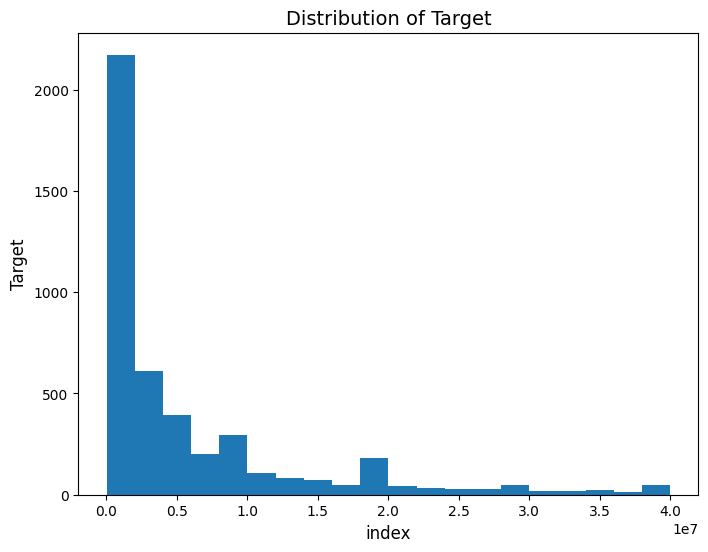

In [13]:
plt.figure(figsize=(8,6))
plt.hist(train_df['target'], bins = 20)
plt.xlabel('index', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.title('Distribution of Target', fontsize=14)
plt.show()

Проверим наличие пропусков

In [14]:
train_df.isna().sum()

ID           0
target       0
48df886f9    0
0deb4b6a8    0
34b15f335    0
            ..
71b203550    0
137efaa80    0
fb36b89d9    0
7e293fbaf    0
9fc776466    0
Length: 4993, dtype: int64

In [15]:
test_df.isna().sum()

ID           0
48df886f9    0
0deb4b6a8    0
34b15f335    0
a8cb14b00    0
            ..
71b203550    1
137efaa80    1
fb36b89d9    1
7e293fbaf    1
9fc776466    1
Length: 4992, dtype: int64

Удалим константные признаки

In [16]:
const_columns_to_remove = []
for col in train_df.columns:
    if col != 'ID' and col != 'target':
        if train_df[col].std() == 0:
            const_columns_to_remove.append(col)

# Now remove that array of const columns from the data
train_df.drop(const_columns_to_remove, axis=1, inplace=True)
test_df.drop(const_columns_to_remove, axis=1, inplace=True)

# Print to see the reduction of columns
print('train_df rows and columns after removing constant columns: ', train_df.shape)

print('Following `{}` Constant Column\n are removed'.format(len(const_columns_to_remove)))
print(const_columns_to_remove)

train_df rows and columns after removing constant columns:  (4459, 4737)
Following `256` Constant Column
 are removed
['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e

Удалим дубликаты

In [17]:
train_df = train_df.loc[:,~train_df.columns.duplicated()]
print('Train rows and columns after removing duplicate columns: ', train_df.shape)

Train rows and columns after removing duplicate columns:  (4459, 4737)


Проверим сколько оперативной памяти занимает датафрейм

In [18]:
def print_memory_usage_of_df(df):
    bytes_per_mb = 0.000001
    memory_usage = round(df.memory_usage().sum() * bytes_per_mb, 3)
    print('Memory usage is ', str(memory_usage) + " MB")

print_memory_usage_of_df(train_df)
print(train_df.shape)

Memory usage is  168.978 MB
(4459, 4737)


Закодируем категориальные признаки используя one-hot encoding

In [19]:
dummy_encoded_train_df = pd.get_dummies(train_df)
dummy_encoded_train_df.shape

(4459, 9195)

In [20]:
print_memory_usage_of_df(dummy_encoded_train_df)

Memory usage is  188.825 MB


Если использовать sparse=True, то закодированные данные будут возвращены в формате SparseArray, который занимает меньше места в оперативной памяти.

In [21]:
dummy_encoded_sparse_train_df = pd.get_dummies(train_df, sparse=True)
dummy_encoded_sparse_train_df.shape

(4459, 9195)

In [22]:
print_memory_usage_of_df(dummy_encoded_sparse_train_df)

Memory usage is  168.965 MB


In [23]:
def convert_df_to_sparse_array(df, exclude_columns=[]):
    df = df.copy()
    exclude_columns = set(exclude_columns)

    for (column_name, column_data) in df.iteritems():
        if column_name in exclude_columns:
            continue
        df[column_name] = pd.SparseArray(column_data.values, dtype='uint8')

    return df

In [24]:
def drop_sparse_from_train_test(train, test):
    column_list_to_drop_data_from = [x for x in train.columns if not x in ['ID','target']]
    for f in column_list_to_drop_data_from:
        if len(np.unique(train[f]))<2:
            train.drop(f, axis=1, inplace=True)
            test.drop(f, axis=1, inplace=True)
    return train, test

train_df, test_df = drop_sparse_from_train_test(train_df, test_df)

In [25]:
X_train = train_df.drop(['ID', 'target'], axis=1)

y_train = np.log1p(train_df['target'].values)

X_test_original = test_df.drop('ID', axis=1)

X_train_split, X_validation, y_train_split, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Обучим модели

In [26]:
def light_gbm_model_run(train_x, train_y, validation_x, validation_y, test_x):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 100,
        "learning_rate" : 0.001,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "seed": 42
    }
    # Given its a regression case, I am using the RMSE as the metric.

    lg_train = lgb.Dataset(train_x, label=train_y)
    lg_validation = lgb.Dataset(validation_x, label=validation_y)
    evals_result_lgbm = {}

    model_light_gbm = lgb.train(params, lg_train, 5000,
                      valid_sets=[lg_train, lg_validation],
                      early_stopping_rounds=100,
                      verbose_eval=150,
                      evals_result=evals_result_lgbm )

    pred_test_light_gbm = np.expm1(model_light_gbm.predict(test_x, num_iteration=model_light_gbm.best_iteration ))

    return pred_test_light_gbm, model_light_gbm, evals_result_lgbm

In [27]:
# Training and output of LightGBM Model
predictions_test_y_light_gbm, model_lgbm, evals_result = light_gbm_model_run(X_train_split, y_train_split, X_validation, y_validation, X_test_original)
print('Output of LightGBM Model training..')

TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [28]:
gain_light_gbm = model_lgbm.feature_importance('gain')
feature_imp_light_gbm = pd.DataFrame({'feature': model_lgbm.feature_name(),
                                      'split': model_lgbm.feature_importance('split'),
                                      'gain': 100 * gain_light_gbm / gain_light_gbm.sum()
}).sort_values('gain', ascending=False)
print(feature_imp_light_gbm[:50])

NameError: name 'model_lgbm' is not defined

In [36]:
def xgb_model_run(train_x, train_y, validation_x, validation_y, test_x):
    params = {
        'objective': 'reg:squarederror',
          'eval_metric': 'rmse',
          'eta': 0.001,
          'max_depth': 10,
          'subsample': 0.6,
          'colsample_bytree': 0.6,
          'alpha':0.001,
          'random_state': 42,
          'tree_method':'gpu_hist'
    }

    training_data = xgb.DMatrix(train_x, train_y)
    validation_data = xgb.DMatrix(validation_x, validation_y)

    watchlist = [(training_data, 'train'), (validation_data, 'valid')]

    model_xgb = xgb.train(params, training_data, 50, watchlist, maximize=False, early_stopping_rounds=100, verbose_eval=100 )

    data_test = xgb.DMatrix(test_x)
    predict_test_xgb = np.expm1(model_xgb.predict(data_test, ntree_limit=model_xgb.best_ntree_limit ) )

    return predict_test_xgb, model_xgb

In [37]:
predictions_test_y_xgb, model_xgb = xgb_model_run(X_train_split, y_train_split, X_validation, y_validation, X_test_original)
print('Completion of XGB Training!!')

XGBoostError: [06:20:13] /workspace/src/tree/updater_gpu_hist.cu:781: Exception in gpu_hist: [06:20:13] /workspace/src/tree/updater_gpu_hist.cu:787: Check failed: ctx_->gpu_id >= 0 (-1 vs. 0) : Must have at least one device
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xb27f2a) [0x7eab85610f2a]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xb3e95a) [0x7eab8562795a]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xb483cd) [0x7eab856313cd]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x460c79) [0x7eab84f49c79]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x46176c) [0x7eab84f4a76c]
  [bt] (5) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4c54f7) [0x7eab84fae4f7]
  [bt] (6) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7eab84c4aef0]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7eabef433e2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7eabef430493]



Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xb27f2a) [0x7eab85610f2a]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xb485c9) [0x7eab856315c9]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x460c79) [0x7eab84f49c79]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x46176c) [0x7eab84f4a76c]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4c54f7) [0x7eab84fae4f7]
  [bt] (5) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7eab84c4aef0]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7eabef433e2e]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7eabef430493]
  [bt] (8) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7eabef4593e9]



In [38]:
model = CatBoostClassifier(iterations=1000,
                           task_type="GPU",
                           devices='0:1')
model.fit(train_data,
          train_labels,
          verbose=False)

NameError: name 'CatBoostClassifier' is not defined

In [39]:
model_catboost = CatBoostRegressor(iterations=500,
                                   learning_rate=0.01,
                                   depth=10,
                                   eval_metric='RMSE',
                                   random_seed = 42,
                                   bagging_temperature=0.2,
                                   od_type='Iter',
                                   metric_period=50,
                                   od_wait=20
                                   )

model_catboost.fit(X_train_split, y_train_split,
                   eval_set=(X_validation, y_validation),
                   use_best_model=True,
                   verbose=50
                   )

predictions_test_y_catboost = np.expm1(model_catboost.predict(X_test_original))

0:	learn: 1.7618119	test: 1.6944327	best: 1.6944327 (0)	total: 3.2s	remaining: 26m 37s
50:	learn: 1.6740572	test: 1.6319638	best: 1.6319638 (50)	total: 3m 13s	remaining: 28m 19s
100:	learn: 1.6091252	test: 1.5909054	best: 1.5909054 (100)	total: 6m 21s	remaining: 25m 8s
150:	learn: 1.5603021	test: 1.5629305	best: 1.5629305 (150)	total: 9m 27s	remaining: 21m 52s
200:	learn: 1.5191812	test: 1.5415846	best: 1.5415846 (200)	total: 12m 33s	remaining: 18m 40s
250:	learn: 1.4853463	test: 1.5246161	best: 1.5246161 (250)	total: 15m 36s	remaining: 15m 29s
300:	learn: 1.4573896	test: 1.5127933	best: 1.5127933 (300)	total: 18m 38s	remaining: 12m 19s
350:	learn: 1.4348035	test: 1.5025969	best: 1.5025969 (350)	total: 21m 43s	remaining: 9m 13s


KeyboardInterrupt: 

# Многоклассовая классификация

**Многоклассовая классификация** - это способность модели классифицировать входные данные на более чем два класса. Если вы рассматривали задачи бинарной классификации, то многоклассовая классификация позволяет вам расширить вашу модель для более общих сценариев. Это актуально в сферах, где категории или классы могут быть множественными, например, в распознавании рукописных букв, классификации изображений, определении типов болезней, анализе текстовых данных и др.

Существует несколько методов и подходов для решения задач многоклассовой классификации:

* **One-vs-All (One-vs-Rest)**: Этот метод заключается в создании бинарных классификаторов для каждого класса. Например, если у нас есть 3 класса (A, B, C), то мы создаем три классификатора: один для класса A против (B+C), второй для класса B против (A+C) и третий для класса C против (A+B). Затем, чтобы сделать прогноз для новых данных, каждый классификатор предсказывает вероятность принадлежности объекта к своему классу, и выбирается класс с наибольшей вероятностью.

* **Softmax-регрессия:** Это обобщение логистической регрессии на многоклассовый случай. Он использует функцию softmax для преобразования выходов модели в вероятности принадлежности к разным классам. Softmax-регрессия часто используется в нейронных сетях для многоклассовой классификации.

* **Деревья принятия решений и случайный лес:** Эти алгоритмы могут быть применены к многоклассовой классификации. Деревья принятия решений разделяют данные на классы с помощью древовидной структуры, а случайный лес комбинирует несколько деревьев для улучшения точности.

* **Нейронные сети:** Глубокие нейронные сети, такие как сверточные нейронные сети (CNN) и рекуррентные нейронные сети (RNN), часто используются для многоклассовой классификации изображений и текстовых данных. Эти сети могут изучать сложные зависимости между данными и классами.

# Дисбаланс классов

В задаче классификации данные называются **несбалансированными (Imbalanced Data)**, если в обучающей выборке доли объектов разных классов существенно различаются, также говорят, что «классы не сбалансированы».

## Oversampling

### Простое повторное использование данных (Random oversampling)

Простое повторное использование данных заключается в увеличении числа экземпляров класса-меньшинства путем случайного повторного выбора данных из этого класса до достижения желаемой пропорции между классами.

### Генерация синтетических данных

#### SMOTE

SMOTE начинает с выбора случайного образца из меньшинства класса.

Для каждого образца алгоритм находит K ближайших соседей в пространстве признаков. Это значение K обычно задается пользователем (часто K=5). Случайно выбирается один из K ближайших соседей.

Создается синтетический образец, который находится на линии, соединяющей выбранный образец и его случайно выбранного соседа. Расстояние от исходного образца до синтетического определяется случайным образом.

Пусть $x$ - исходный образец, $x_{сосед}$ - выбранный сосед, а $x_{синт.}$ - синтетический образец.

Синтетический образец создается по формуле:

$x_{синт.} = x + (x_{сосед} - x) \cdot \delta$

где $\delta$ - случайное число в интервале [0, 1].

SMOTE первоначально разработан для работы с числовыми данными. Для категориальных данных требуются модификации алгоритма, например, SMOTE-NC (Non-Continuous).

Большее значение K может привести к большей разнообразности синтетических данных, но также может увеличить риск создания менее релевантных образцов.

#### ADASYN

Для каждого образца из меньшинства классов алгоритм оценивает, насколько сложно его классифицировать. Это обычно делается путем измерения количества образцов из доминирующего класса в его ближайшем окружении (например, среди K ближайших соседей).

На основе оценки сложности, каждому образцу из меньшинства классов присваивается вес, отражающий его важность в процессе генерации новых данных.

ADASYN генерирует больше синтетических данных для тех образцов, которые считаются более сложными для классификации. Процесс создания синтетических данных аналогичен SMOTE, но учитывает распределение весов.

Как и в SMOTE, синтетические образцы создаются путем линейной интерполяции между выбранным образцом и его случайно выбранным ближайшим соседом из меньшинства класса.

ADASYN, как и SMOTE, лучше всего работает с числовыми данными. Для категориальных данных потребуются модификации алгоритма.

## Undersampling

### Случайное удаление данных (Random Undersampling)

В задачах классификации классы могут иметь разное количество примеров, и это может привести к смещению в обучении модели. Модель, обученная на несбалансированных данных, может иметь тенденцию предсказывать больший класс, игнорируя меньший.

Random Undersampling решает эту проблему, уменьшая количество экземпляров большего класса до уровня меньшего класса. Процесс заключается в случайном удалении части примеров из большего класса до достижения желаемого баланса.

### Tomek Links

Tomek Links идентифицирует пары близких соседей, в которых один пример принадлежит классу меньшинства, а другой - классу большинства. Такие пары соседей называются Tomek Links. После их идентификации удаляется пример из класса большинства, что помогает уменьшить дисбаланс данных.

Процесс начинается с предварительной подготовки данных, должны быть размеченные данные с несбалансированными классами.

Для каждого примера данных мы вычисляем расстояния до всех остальных примеров. Затем для каждого примера из класса меньшинства мы ищем его ближайшего соседа из класса большинства и наоборот. Если расстояние между этими двумя примерами минимальное, они образуют Tomek Link.

После того как все Tomek Links были идентифицированы, мы удаляем примеры, которые находятся на концах этих связей из класса большинства. Это может быть сделано путем создания нового набора данных без этих точек.

Выбор между oversampling и undersampling зависит от конкретной задачи, объема данных и их характеристик.

Большинство методов устранения дисбаланса классов реализовано в библиотеке imblearn: https://pypi.org/project/imblearn/

## Практические задания

1. Используя данные по мошенническим транзакциям (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) предобработайте данные и проанализируйте их.


In [40]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [30]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

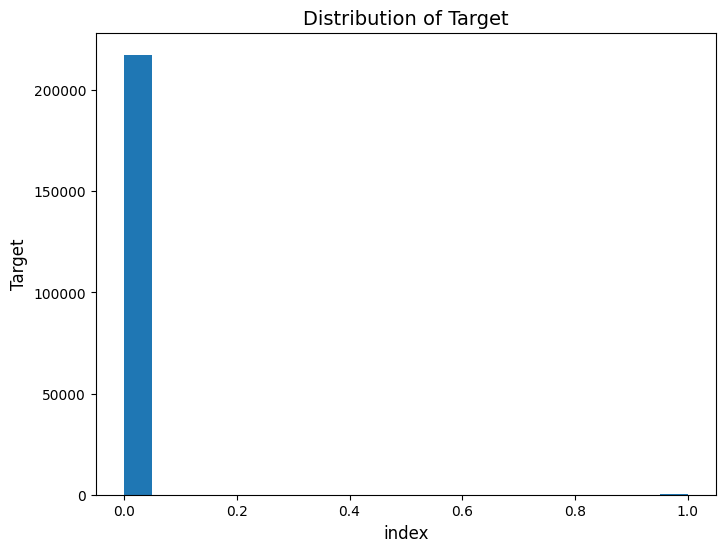

In [31]:
plt.figure(figsize=(8,6))
plt.hist(df['Class'], bins = 20)
plt.xlabel('index', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.title('Distribution of Target', fontsize=14)
plt.show()

In [32]:
const_columns_to_remove = []
for col in df.columns:
    if col != 'ID' and col != 'time':
        if df[col].std() == 0:
            const_columns_to_remove.append(col)

# Now remove that array of const columns from the data
df.drop(const_columns_to_remove, axis=1, inplace=True)
df.drop(const_columns_to_remove, axis=1, inplace=True)

# Print to see the reduction of columns
print('df rows and columns after removing constant columns: ', df.shape)

print('Following `{}` Constant Column\n are removed'.format(len(const_columns_to_remove)))
print(const_columns_to_remove)

df rows and columns after removing constant columns:  (217924, 31)
Following `0` Constant Column
 are removed
[]


In [33]:
df = df.loc[:,~df.columns.duplicated()]
print('Train rows and columns after removing duplicate columns: ', df.shape)

Train rows and columns after removing duplicate columns:  (217924, 31)


In [34]:
def print_memory_usage_of_df(df):
    bytes_per_mb = 0.000001
    memory_usage = round(df.memory_usage().sum() * bytes_per_mb, 3)
    print('Memory usage is ', str(memory_usage) + " MB")

print_memory_usage_of_df(df)
print(df.shape)

Memory usage is  54.045 MB
(217924, 31)


2. Устраните дисбаланс классов одним из рассмотренных способов. МОжно использовать библиотеку imblearn. Выберите метод устранения дисбаланса классов, который показал наилучший результат.

In [42]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [41]:
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X, y)

print("Original class distribution: ")
print(y.value_counts())
print("SMOTE class distribution: ")
print(y_smote.value_counts())

ValueError: Input y contains NaN.

In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter

adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Посмотрим на новое распределение классов
print(Counter(y_resampled))

Counter({0: 284315, 1: 284298})


3. Обучите модели случайного леса, XGBoost, LightGBM и Catboost. Подберите оптимальные гиперпараметры для каждой из моделей. Сравните качество построенных моделей.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Обучение моделей
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)

xgb = XGBClassifier()
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test)

lgbm = LGBMClassifier()
lgbm.fit(X_train_resampled, y_train_resampled)
y_pred_lgbm = lgbm.predict(X_test)

catboost = CatBoostClassifier()
catboost.fit(X_train_resampled, y_train_resampled)
y_pred_catboost = catboost.predict(X_test)

[LightGBM] [Info] Number of positive: 227373, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.140307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454824, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499914 -> initscore=-0.000343
[LightGBM] [Info] Start training from score -0.000343
Learning rate set to 0.140551
0:	learn: 0.4224244	total: 206ms	remaining: 3m 25s
1:	learn: 0.2678683	total: 339ms	remaining: 2m 49s
2:	learn: 0.1949857	total: 461ms	remaining: 2m 33s
3:	learn: 0.1539235	total: 575ms	remaining: 2m 23s
4:	learn: 0.1312667	total: 712ms	remaining: 2m 21s
5:	learn: 0.1136101	total: 840ms	remaining: 2m 19s
6:	learn: 0.1006697	total: 968ms	remaining: 2m 17s
7:	learn: 0.0894429	total: 1.09s	remaining: 2m 15s
8:	learn: 0.0803340	total: 1.24s	remaining: 2m 16s
9:	learn: 0.07

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import make_pipeline
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

models = {
    'RandomForest': RandomForestClassifier(),
#    'XGBoost': xgb.XGBClassifier(),
 #   'LightGBM': lgb.LGBMClassifier(),
  #  'CatBoost': CatBoostClassifier(verbose=0)
}

for model_name, model in models.items():
    for resampler in [adasyn, smote]:
        pipeline = make_pipeline(resampler, model)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f'{model_name} with {resampler} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

KeyboardInterrupt: 

In [ ]:
# Обучение модели RandomForest
# Настройка гиперпараметров
n_estimators_range = range(10, 1000, 200)
max_depth_range = range(1, 6)
best_precision = 0
best_recall = 0
best_f1 = 0
best_n_estimators = 0
best_max_depth = 0

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        rf.fit(X_train_resampled, y_train_resampled)
        y_pred = rf.predict(X_test)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_precision = precision
            best_recall = recall
            best_n_estimators = n_estimators
            best_max_depth = max_depth

print('Best combination of hyperparameters:')
print(f'Number of Trees (n_estimators): {best_n_estimators}')
print(f'Max Depth: {best_max_depth}')
print(f'Precision: {best_precision:.4f}')
print(f'Recall: {best_recall:.4f}')
print(f'F1 Score: {best_f1:.4f}')

KeyboardInterrupt: 

4. На основе подобранных гиперпараметров проанализируйте влияние гиперпараметров число деревьев в ансамбле и максимальная глибина деревьев на качество модели. Для модели с оптимальными значениями гиперпараметров, которые подобраны в п. 2 меняете число деревьев в ансамбле от 10 до 1000 с шагом 50 (если будет долго обучаться можно рассмотреть больший шаг изменения гиперпараметра). Аналогично, для максимальной глубины деревьев использую модель с подобранными гиперпараметрами меняем максимальную глубину деревьев от 1 до 7 и анализируем результаты. Нужно построить графики зависимости метрик (precision, recall, f1-score) от меняемого гиперпараметра (итого для одной модели - два графика).

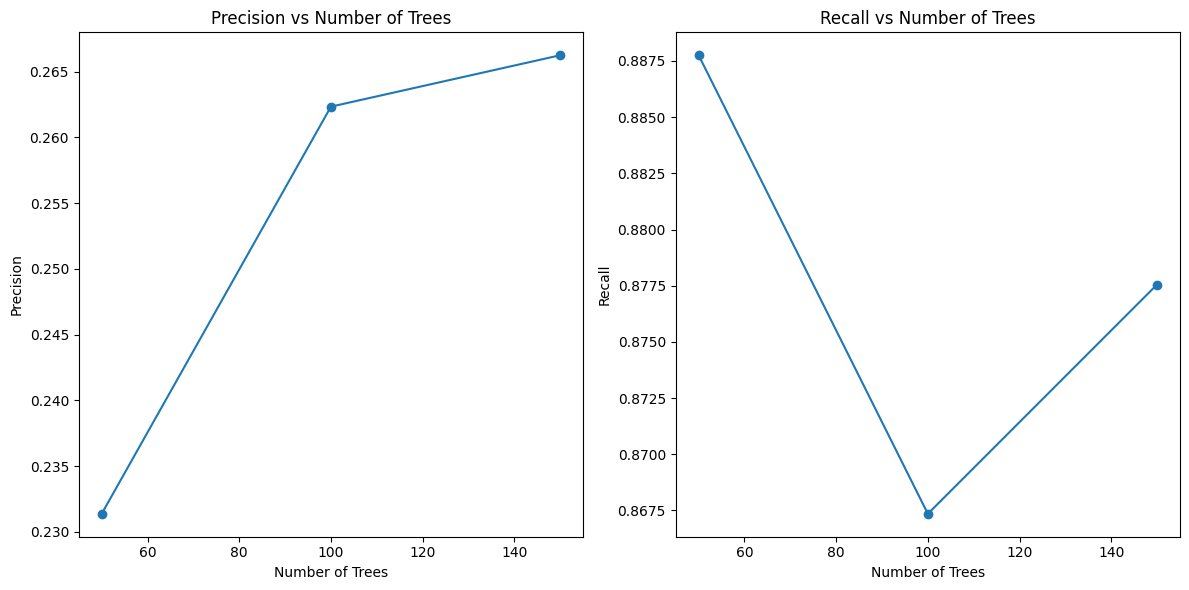

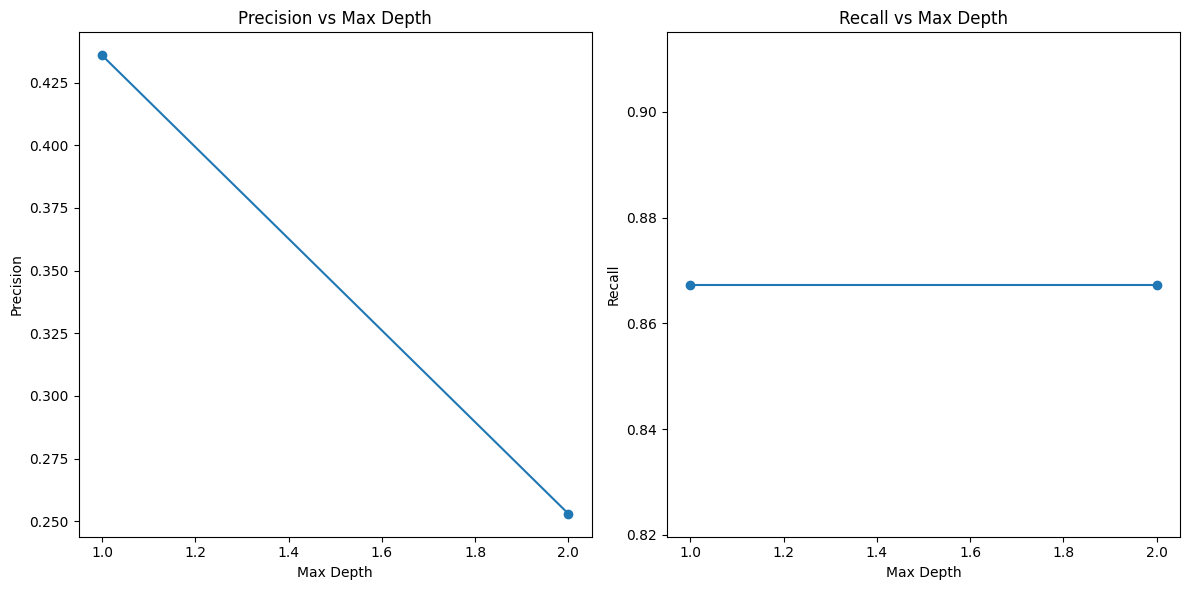

In [ ]:
precision_scores = []
recall_scores = []
f1_scores = []

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=best_max_depth)
    rf.fit(X_train_resampled, y_train_resampled)
    y_pred = rf.predict(X_test)

    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, precision_scores, marker='o')
plt.title('Precision vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Precision')

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, recall_scores, marker='o')
plt.title('Recall vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

depth_precision_scores = []
depth_recall_scores = []
depth_f1_scores = []

for max_depth in max_depth_range:
    rf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=max_depth)
    rf.fit(X_train_resampled, y_train_resampled)
    y_pred = rf.predict(X_test)

    depth_precision_scores.append(precision_score(y_test, y_pred))
    depth_recall_scores.append(recall_score(y_test, y_pred))
    depth_f1_scores.append(f1_score(y_test, y_pred))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(max_depth_range, depth_precision_scores, marker='o')
plt.title('Precision vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Precision')

plt.subplot(1, 2, 2)
plt.plot(max_depth_range, depth_recall_scores, marker='o')
plt.title('Recall vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()
